<a href="https://colab.research.google.com/github/fatimabalig/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [69]:
import subprocess
#command to unzip the file
command='unzip "/content/archive (1).zip"'

#execute the command
subprocess.call(command,shell=True)

1

In [70]:
# Load the datasets
train_df = pd.read_csv('/content/fraudTrain.csv',header=0)
test_df = pd.read_csv('/content/fraudTest.csv',header=0)

# Display the first few rows of the datasets
train_df.head()
test_df.head()



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [77]:
# Display summary statistics and check for missing values
print(train_df.describe())
print(train_df.isnull().sum())


          Unnamed: 0        cc_num            amt            zip  \
count  477751.000000  4.777510e+05  477751.000000  477750.000000   
mean   238875.000000  4.162300e+17      70.543046   48749.006221   
std    137914.978565  1.307364e+18     160.186107   26912.206201   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    119437.500000  1.800365e+14       9.650000   26041.000000   
50%    238875.000000  3.519607e+15      47.540000   48154.000000   
75%    358312.500000  4.642255e+15      83.260000   72011.000000   
max    477750.000000  4.992346e+18   25086.940000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  477750.000000  477750.000000  4.777500e+05  4.777500e+05   
mean       38.536690     -90.198560  8.939614e+04  1.335365e+09   
std         5.072597      13.761333  3.037412e+05  5.140446e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.790900  7.430000e+02  1

In [78]:
train_df_cleaned = train_df.dropna()

In [80]:
train_df_cleaned.isnull().values.any()

False

In [81]:
# Display summary statistics and check for missing values
print(train_df_cleaned.describe())
print(train_df_cleaned.isnull().sum())


         Unnamed: 0        cc_num            amt            zip  \
count  477750.00000  4.777500e+05  477750.000000  477750.000000   
mean   238874.50000  4.162308e+17      70.543177   48749.006221   
std    137914.68989  1.307365e+18     160.186249   26912.206201   
min         0.00000  6.041621e+10       1.000000    1257.000000   
25%    119437.25000  1.800365e+14       9.650000   26041.000000   
50%    238874.50000  3.519607e+15      47.540000   48154.000000   
75%    358311.75000  4.642255e+15      83.260000   72011.000000   
max    477749.00000  4.992346e+18   25086.940000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  477750.000000  477750.000000  4.777500e+05  4.777500e+05   
mean       38.536690     -90.198560  8.939614e+04  1.335365e+09   
std         5.072597      13.761333  3.037412e+05  5.140446e+06   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.790900  7.430000e+02  1.331228e+

In [43]:
print(test_df.describe())
print(test_df.isnull().sum())

          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [82]:
#print the shape of the data
print(train_df_cleaned.shape)
print(test_df.shape)

(477750, 23)
(555719, 23)


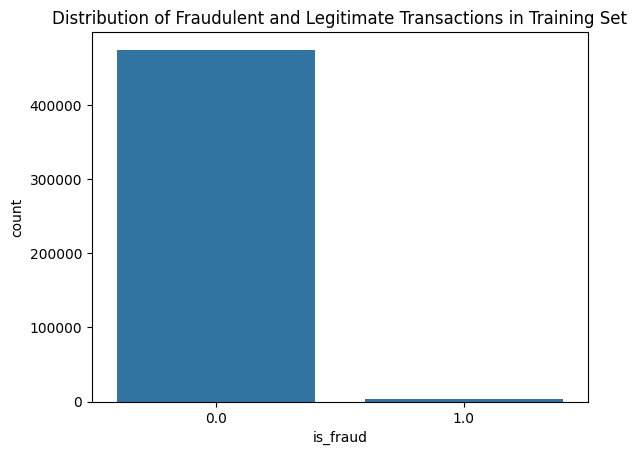

In [83]:
# Separate features and target variable
X_train = train_df_cleaned.drop(columns='is_fraud')  # Assuming 'Class' is the target column
y_train = train_df_cleaned['is_fraud']
X_test = test_df.drop(columns='is_fraud')    # Assuming 'Class' is the target column
y_test = test_df['is_fraud']

# Check the balance of the target variable
sns.countplot(x=y_train)
plt.title('Distribution of Fraudulent and Legitimate Transactions in Training Set')
plt.show()

In [84]:
combined_df=pd.concat([test_df,train_df_cleaned],axis=0)

combined_df.drop(labels=["first","last","job","dob","trans_num","street","trans_date_trans_time","cc_num","city","state"],axis=1,inplace=True)


In [85]:
combined_df.head()

,Unnamed: 0,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,fraud_Kirlin and Sons,personal_care,2.86,M,29209.0,33.9659,-80.9355,333497.0,1.371817e+09,33.986391,-81.200714,0.0
1,1,fraud_Sporer-Keebler,personal_care,29.84,F,84002.0,40.3207,-110.4360,302.0,1.371817e+09,39.450498,-109.960431,0.0
2,2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710.0,40.6729,-73.5365,34496.0,1.371817e+09,40.495810,-74.196111,0.0
3,3,fraud_Haley Group,misc_pos,60.05,M,32780.0,28.5697,-80.8191,54767.0,1.371817e+09,28.812398,-80.883061,0.0
4,4,fraud_Johnston-Casper,travel,3.19,M,49632.0,44.2529,-85.0170,1126.0,1.371817e+09,44.959148,-85.884734,0.0


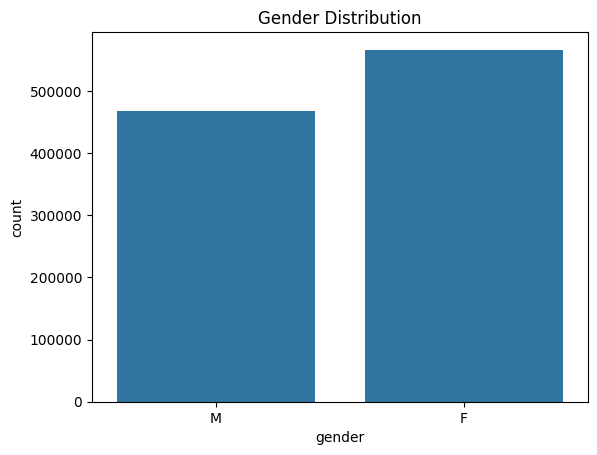

In [86]:
sns.countplot(x='gender',data=combined_df)
plt.title("Gender Distribution")
plt.show()

In [87]:
encoder=LabelEncoder()
new_col=encoder.fit_transform(combined_df["merchant"].values)
combined_df["merchant_new"]=new_col
combined_df.drop(labels=["merchant"],axis=1,inplace=True)


In [88]:
encoder=LabelEncoder()
new_col1=encoder.fit_transform(combined_df["category"].values)
combined_df["category_new"]=new_col
combined_df.drop(labels=["category"],axis=1,inplace=True)



In [89]:
combined_df=pd.get_dummies(combined_df)
combined_df.drop(labels=['gender_F'],axis=1,inplace=True)

In [52]:
combined_df.head()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merchant_new,category_new,gender_M
0,0,2.86,29209.0,33.9659,-80.9355,333497.0,1.371817e+09,33.986391,-81.200714,0.0,319,319,True
1,1,29.84,84002.0,40.3207,-110.4360,302.0,1.371817e+09,39.450498,-109.960431,0.0,591,591,False
2,2,41.28,11710.0,40.6729,-73.5365,34496.0,1.371817e+09,40.495810,-74.196111,0.0,611,611,False
3,3,60.05,32780.0,28.5697,-80.8191,54767.0,1.371817e+09,28.812398,-80.883061,0.0,222,222,True
4,4,3.19,49632.0,44.2529,-85.0170,1126.0,1.371817e+09,44.959148,-85.884734,0.0,292,292,True


In [90]:
# Separate features and target variable
X_df = combined_df.drop(columns="is_fraud",axis=1)
y_df = combined_df["is_fraud"]

# Identify categorical features
categorical_features = X_df.select_dtypes(include=['object']).columns.tolist()

# Define the preprocessor for handling both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_df.select_dtypes(include=[np.number]).columns.tolist()),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



In [91]:
# Create pipelines for each model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100))
])

tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=42))
])


In [92]:
X_train, X_test, y_train, y_test= train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [93]:
# Train Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'amt', 'zip',
                                                   'lat', 'long', 'city_pop',
                                                   'unix_time', 'merch_lat',
                                                   'merch_long', 'merchant_new',
                                                   'category_new']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier', LogisticRegression())])

In [94]:
# Train Decision Tree model
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'amt', 'zip',
                                                   'lat', 'long', 'city_pop',
                                                   'unix_time', 'merch_lat',
                                                   'merch_long', 'merchant_new',
                                                   'category_new']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [95]:
# Train Random Forest model
forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Unnamed: 0', 'amt', 'zip',
                                                   'lat', 'long', 'city_pop',
                                                   'unix_time', 'merch_lat',
                                                   'merch_long', 'merchant_new',
                                                   'category_new']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [96]:
# Function to print evaluation metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

# Evaluate Logistic Regression
print('Logistic Regression:')
evaluate_model(log_reg_pipeline, X_test, y_test)

# Evaluate Decision Tree
print('\nDecision Tree:')
evaluate_model(tree_pipeline, X_test, y_test)

# Evaluate Random Forest
print('\nRandom Forest:')
evaluate_model(forest_pipeline, X_test, y_test)

Logistic Regression:
Confusion Matrix:
[[205558     99]
 [  1037      0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    205657
         1.0       0.00      0.00      0.00      1037

    accuracy                           0.99    206694
   macro avg       0.50      0.50      0.50    206694
weighted avg       0.99      0.99      0.99    206694

ROC AUC Score: 0.4997593079739566

Decision Tree:
Confusion Matrix:
[[204995    662]
 [   581    456]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    205657
         1.0       0.41      0.44      0.42      1037

    accuracy                           0.99    206694
   macro avg       0.70      0.72      0.71    206694
weighted avg       0.99      0.99      0.99    206694

ROC AUC Score: 0.7182555192062708

Random Forest:
Confusion Matrix:
[[205578     79]
 [   598    439]]

Classification Re

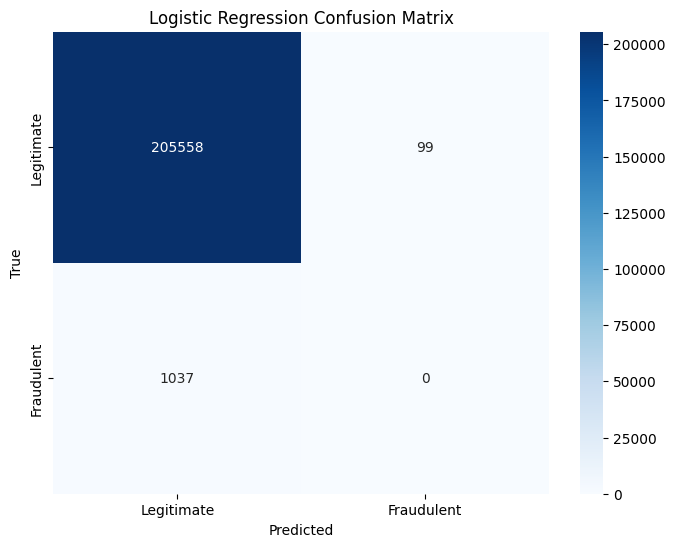

In [101]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(log_reg_pipeline, X_test, y_test, 'Logistic Regression Confusion Matrix')

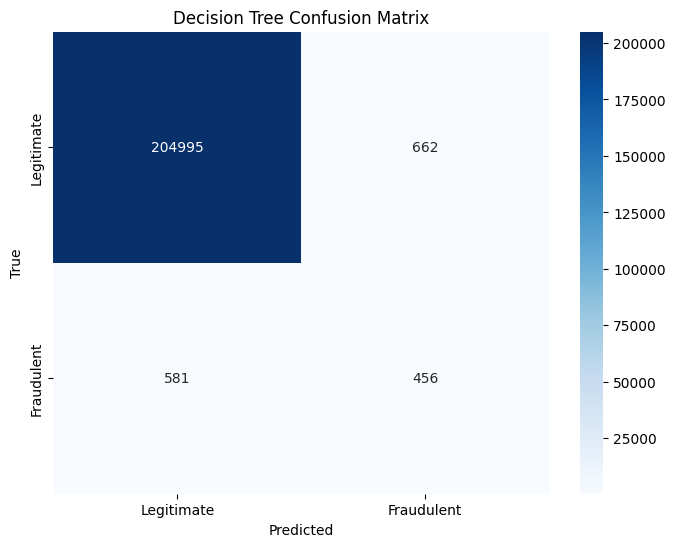

In [99]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, 'Decision Tree Confusion Matrix')

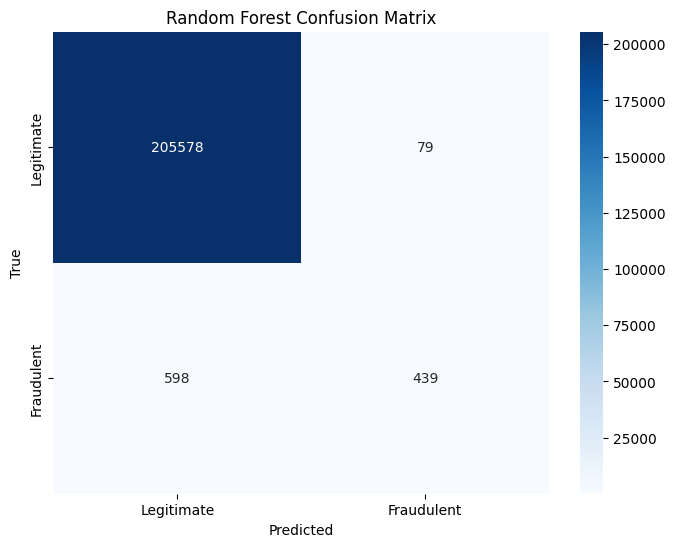

In [100]:
plot_confusion_matrix(forest_pipeline, X_test, y_test, 'Random Forest Confusion Matrix')


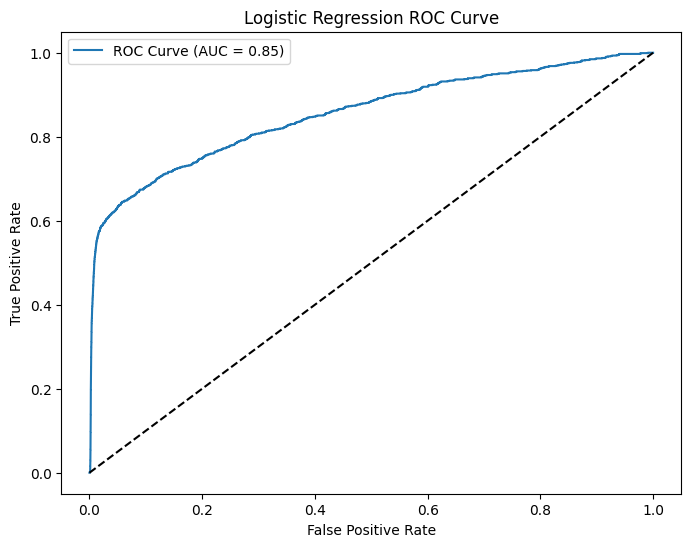

In [104]:
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Plot ROC curves
plot_roc_curve(log_reg_pipeline, X_test, y_test, 'Logistic Regression ROC Curve')

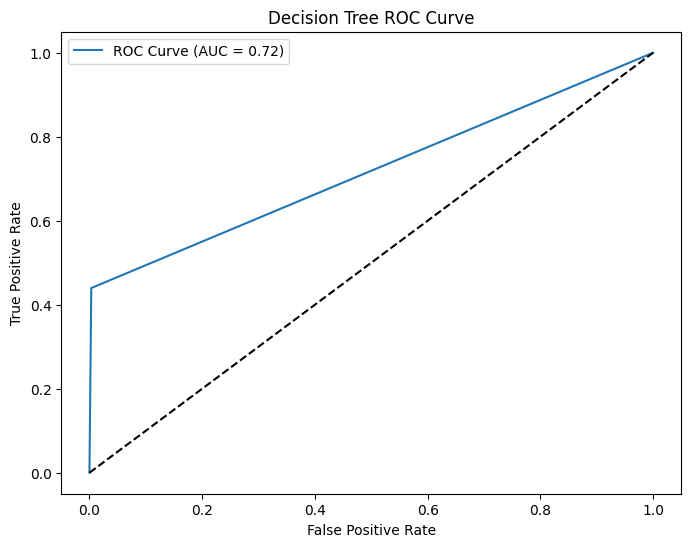

In [102]:
plot_roc_curve(tree_pipeline, X_test, y_test, 'Decision Tree ROC Curve')

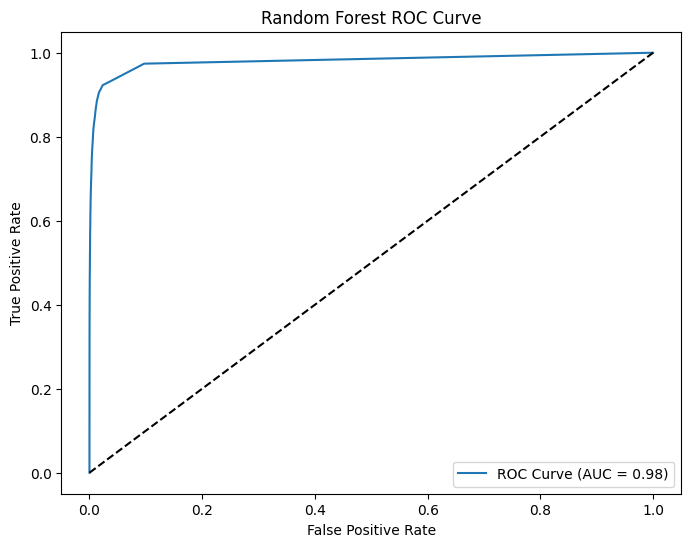

In [103]:
plot_roc_curve(forest_pipeline, X_test, y_test, 'Random Forest ROC Curve')